<a href="https://colab.research.google.com/github/BenzineMohammedAymen/Binary-Classification-Appel-VS-Lemon-/blob/main/TP_DL_(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rarfile

  Using cached rarfile-4.2-py3-none-any.whl.metadata (4.4 kB)
Using cached rarfile-4.2-py3-none-any.whl (29 kB)


In [ ]:
import rarfile
import os

rar_file_path = '/content/Dataset.rar'
extraction_path = '/content/Dataset'


os.makedirs(extraction_path, exist_ok=True)


with rarfile.RarFile(rar_file_path) as rf:
    rf.extractall(extraction_path)

print("Extraction complete!")

Extraction complete!


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

def load_images_from_folder(folder, data_type):
    images = []
    labels = []
    for label in ['apple', 'lemon']:
        label_folder = os.path.join(folder, label, data_type)
        for filename in os.listdir(label_folder):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                img = Image.open(os.path.join(label_folder, filename)).convert('RGB')
                images.append(np.array(img) / 255.0)
                labels.append(0 if label == 'apple' else 1)
    return np.array(images), np.array(labels)

def preprocess_data(base_folder):
    X_train, y_train = load_images_from_folder(base_folder, 'train')
    X_test, y_test = load_images_from_folder(base_folder, 'test')

    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    return X_train, X_test, y_train, y_test
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


#**For Segmoid Activation Functions**








In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.hidden_input = np.dot(X, self.W1) + self.b1
        self.hidden_output = sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.W2) + self.b2
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y, learning_rate):
      m = len(X)
      output_error = 1/m*(self.final_output - y.reshape(-1, 1))
      dA = sigmoid_derivative(self.final_input)
      dW2 = np.dot(self.hidden_output.T, output_error * dA)
      db2 = np.sum(output_error * dA, axis=0, keepdims=True)

      hidden_error = np.dot(output_error, self.W2.T)
      dH1 = sigmoid_derivative(self.hidden_input)
      dW1 = np.dot(X.T, hidden_error * dH1)
      db1 = np.sum(hidden_error * dH1, axis=0, keepdims=True)

      self.W2 -= learning_rate * dW2
      self.b2 -= learning_rate * db2
      self.W1 -= learning_rate * dW1
      self.b1 -= learning_rate * db1


    def train_SGD(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(X)):
                X_sample = X[i:i + 1]
                y_sample = y[i:i + 1]
                self.forward(X_sample)
                self.backward(X_sample, y_sample, learning_rate)
            loss = mean_squared_error(y, self.forward(X))
            print(f'Epoch {epoch + 1}, Loss: {loss:.8f}')

    def train_BGD(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
          self.forward(X)
          self.backward(X, y, learning_rate)
          loss = mean_squared_error(y, self.forward(X))
          print(f'Epoch {epoch + 1}, Loss: {loss:.8f}')

    def train_MBGD(self, X, y, epochs, batch_size, learning_rate):
        for epoch in range(epochs):
            for i in range(0, len(X), batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                self.forward(X_batch)
                self.backward(X_batch, y_batch, learning_rate)
            loss = mean_squared_error(y, self.forward(X))
            print(f'Epoch {epoch + 1}, Loss: {loss:.8f}')


Training with Stochastic Gradient Descent (SGD):
Epoch 1, Loss: 0.25073313
Epoch 2, Loss: 0.25184273
Epoch 3, Loss: 0.25286908
Epoch 4, Loss: 0.25372572
Epoch 5, Loss: 0.25453097
Epoch 6, Loss: 0.25541485
Epoch 7, Loss: 0.25644308
Epoch 8, Loss: 0.25764465
Epoch 9, Loss: 0.25907723
Epoch 10, Loss: 0.26078617
Epoch 11, Loss: 0.26278882
Epoch 12, Loss: 0.26507818
Epoch 13, Loss: 0.26763062
Epoch 14, Loss: 0.27041332
Epoch 15, Loss: 0.27338967
Epoch 16, Loss: 0.27652438
Epoch 17, Loss: 0.27979026
Epoch 18, Loss: 0.28317317
Epoch 19, Loss: 0.28667079
Epoch 20, Loss: 0.29028662
Epoch 21, Loss: 0.29402359
Epoch 22, Loss: 0.29787965
Epoch 23, Loss: 0.30184591
Epoch 24, Loss: 0.30590686
Epoch 25, Loss: 0.31004179
Epoch 26, Loss: 0.31422684
Epoch 27, Loss: 0.31843690
Epoch 28, Loss: 0.32264714
Epoch 29, Loss: 0.32683423
Epoch 30, Loss: 0.33097707
Epoch 31, Loss: 0.33505727
Epoch 32, Loss: 0.33905929
Epoch 33, Loss: 0.34297043
Epoch 34, Loss: 0.34678073
Epoch 35, Loss: 0.35048269
Epoch 36, Loss

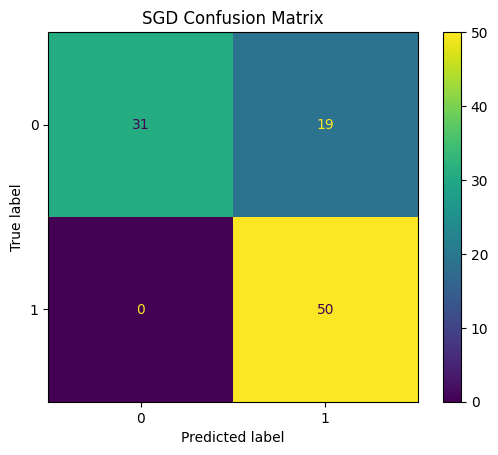


Training with Batch Gradient Descent (BGD):
Epoch 1, Loss: 0.25015833
Epoch 2, Loss: 0.25015748
Epoch 3, Loss: 0.25015664
Epoch 4, Loss: 0.25015580
Epoch 5, Loss: 0.25015497
Epoch 6, Loss: 0.25015414
Epoch 7, Loss: 0.25015331
Epoch 8, Loss: 0.25015249
Epoch 9, Loss: 0.25015168
Epoch 10, Loss: 0.25015087
Epoch 11, Loss: 0.25015006
Epoch 12, Loss: 0.25014926
Epoch 13, Loss: 0.25014846
Epoch 14, Loss: 0.25014766
Epoch 15, Loss: 0.25014687
Epoch 16, Loss: 0.25014608
Epoch 17, Loss: 0.25014530
Epoch 18, Loss: 0.25014452
Epoch 19, Loss: 0.25014375
Epoch 20, Loss: 0.25014298
Epoch 21, Loss: 0.25014221
Epoch 22, Loss: 0.25014145
Epoch 23, Loss: 0.25014069
Epoch 24, Loss: 0.25013993
Epoch 25, Loss: 0.25013918
Epoch 26, Loss: 0.25013844
Epoch 27, Loss: 0.25013769
Epoch 28, Loss: 0.25013695
Epoch 29, Loss: 0.25013622
Epoch 30, Loss: 0.25013549
Epoch 31, Loss: 0.25013476
Epoch 32, Loss: 0.25013404
Epoch 33, Loss: 0.25013332
Epoch 34, Loss: 0.25013260
Epoch 35, Loss: 0.25013189
Epoch 36, Loss: 0.2

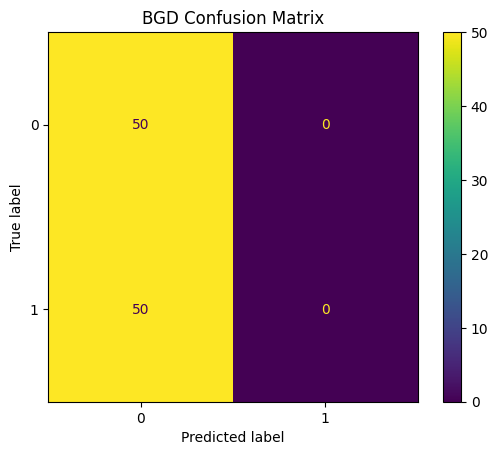


Training with Mini-Batch Gradient Descent (MBGD):
Epoch 1, Loss: 0.25000389
Epoch 2, Loss: 0.25000469
Epoch 3, Loss: 0.25000561
Epoch 4, Loss: 0.25000667
Epoch 5, Loss: 0.25000783
Epoch 6, Loss: 0.25000910
Epoch 7, Loss: 0.25001047
Epoch 8, Loss: 0.25001193
Epoch 9, Loss: 0.25001348
Epoch 10, Loss: 0.25001510
Epoch 11, Loss: 0.25001680
Epoch 12, Loss: 0.25001857
Epoch 13, Loss: 0.25002040
Epoch 14, Loss: 0.25002229
Epoch 15, Loss: 0.25002424
Epoch 16, Loss: 0.25002624
Epoch 17, Loss: 0.25002828
Epoch 18, Loss: 0.25003038
Epoch 19, Loss: 0.25003252
Epoch 20, Loss: 0.25003469
Epoch 21, Loss: 0.25003691
Epoch 22, Loss: 0.25003917
Epoch 23, Loss: 0.25004146
Epoch 24, Loss: 0.25004378
Epoch 25, Loss: 0.25004613
Epoch 26, Loss: 0.25004852
Epoch 27, Loss: 0.25005093
Epoch 28, Loss: 0.25005338
Epoch 29, Loss: 0.25005585
Epoch 30, Loss: 0.25005835
Epoch 31, Loss: 0.25006088
Epoch 32, Loss: 0.25006344
Epoch 33, Loss: 0.25006602
Epoch 34, Loss: 0.25006863
Epoch 35, Loss: 0.25007127
Epoch 36, Los

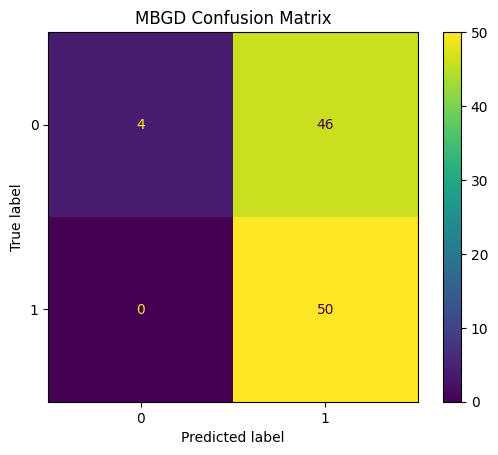

In [ ]:
def main():
    base_folder = '/content/Dataset'


    X_train, X_test, y_train, y_test = preprocess_data(base_folder)


    input_size = X_train.shape[1]
    hidden_size = 80
    output_size = 1


    print("\nTraining with Stochastic Gradient Descent (SGD):")
    mlp_sgd = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    start_time = time.time()
    mlp_sgd.train_SGD(X_train, y_train, epochs=50, learning_rate=0.001)
    training_time = time.time() - start_time
    print(f'SGD Training time: {training_time:.2f} seconds')
    evaluate_model(mlp_sgd, X_test, y_test, "SGD")


    print("\nTraining with Batch Gradient Descent (BGD):")
    mlp_bgd = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    start_time = time.time()
    mlp_bgd.train_BGD(X_train, y_train, epochs=50, learning_rate=0.001)
    training_time = time.time() - start_time
    print(f'BGD Training time: {training_time:.2f} seconds')
    evaluate_model(mlp_bgd, X_test, y_test, "BGD")


    print("\nTraining with Mini-Batch Gradient Descent (MBGD):")
    mlp_mbgd = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    start_time = time.time()
    mlp_mbgd.train_MBGD(X_train, y_train, epochs=50, batch_size=20, learning_rate=0.001)
    training_time = time.time() - start_time
    print(f'MBGD Training time: {training_time:.2f} seconds')
    evaluate_model(mlp_mbgd, X_test, y_test, "MBGD")

def evaluate_model(model, X_test, y_test, method_name):

    y_pred = model.forward(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    accuracy = np.mean(y_pred_classes.flatten() == y_test)


    print(f"\n{method_name} Model Predictions:")
    for i in range(len(y_test)):
        print(f"True Label: {y_test[i]}, Predicted: {y_pred_classes[i][0]}")

    print(f"{method_name} Accuracy: {accuracy * 100:.2f}%")

    cm = confusion_matrix(y_test, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{method_name} Confusion Matrix')
    plt.show()

if __name__ == '__main__':
    main()


#**For Relu Activation Functions**

In [ ]:
class MLP_relu:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.hidden_input = np.dot(X, self.W1) + self.b1
        self.hidden_output = relu(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.W2) + self.b2
        self.final_output = relu(self.final_input)
        return self.final_output

    def backward(self, X, y, learning_rate):
      m = len(X)
      output_error = 1/m * (self.final_output - y.reshape(-1, 1))
      dA = relu_derivative(self.final_input)
      dW2 = np.dot(self.hidden_output.T, output_error * dA)

      db2 = np.sum(output_error * dA, axis=0, keepdims=True)
      hidden_error = np.dot(output_error, self.W2.T)
      dH1 = relu_derivative(self.hidden_input)
      dW1 = np.dot(X.T, hidden_error * dH1)
      db1 = np.sum(hidden_error * dH1, axis=0, keepdims=True)

      self.W2 -= learning_rate * dW2
      self.b2 -= learning_rate * db2
      self.W1 -= learning_rate * dW1
      self.b1 -= learning_rate * db1


    def train_SGD(self, X, y, epochs, learning_rate):
        loss_curve = []
        for epoch in range(epochs):
            for i in range(len(X)):
                X_sample = X[i:i + 1]
                y_sample = y[i:i + 1]
                self.forward(X_sample)
                self.backward(X_sample, y_sample, learning_rate)
            y_pred = self.forward(X)
            loss = mean_squared_error(y, y_pred)
            loss_curve.append(loss)
            print(f'Epoch {epoch + 1}, Loss: {loss:.8f}')
        return loss_curve

    def train_BGD(self, X, y, epochs, learning_rate):
        loss_curve = []
        for epoch in range(epochs):
          self.forward(X)
          self.backward(X, y, learning_rate)
          y_pred = self.forward(X)
          loss = mean_squared_error(y, y_pred)
          loss_curve.append(loss)
          print(f'Epoch {epoch + 1}, Loss: {loss:.8f}')
        return loss_curve


    def train_MBGD(self, X, y, epochs, batch_size, learning_rate):
        loss_curve = []
        for epoch in range(epochs):
            for i in range(0, len(X), batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                self.forward(X_batch)
                self.backward(X_batch, y_batch, learning_rate)
            y_pred = self.forward(X)
            loss = mean_squared_error(y, y_pred)
            loss_curve.append(loss)
            print(f'Epoch {epoch + 1}, Loss: {loss:.8f}')
        return loss_curve


Relu Activation Function
______________________________________________


Training with Stochastic Gradient Descent (SGD):
Epoch 1, Loss: 0.39321279
Epoch 2, Loss: 0.34128306
Epoch 3, Loss: 0.30715357
Epoch 4, Loss: 0.28579887
Epoch 5, Loss: 0.27327817
Epoch 6, Loss: 0.26656618
Epoch 7, Loss: 0.26343541
Epoch 8, Loss: 0.26236430
Epoch 9, Loss: 0.26237596
Epoch 10, Loss: 0.26289424
Epoch 11, Loss: 0.26359994
Epoch 12, Loss: 0.26432776
Epoch 13, Loss: 0.26501135
Epoch 14, Loss: 0.26562426
Epoch 15, Loss: 0.26616757
Epoch 16, Loss: 0.26665269
Epoch 17, Loss: 0.26709021
Epoch 18, Loss: 0.26749796
Epoch 19, Loss: 0.26788192
Epoch 20, Loss: 0.26824050
Epoch 21, Loss: 0.26858361
Epoch 22, Loss: 0.26892080
Epoch 23, Loss: 0.26925359
Epoch 24, Loss: 0.26958603
Epoch 25, Loss: 0.26992690
Epoch 26, Loss: 0.27027728
Epoch 27, Loss: 0.27063853
Epoch 28, Loss: 0.27100826
Epoch 29, Loss: 0.27138359
Epoch 30, Loss: 0.27176870
Epoch 31, Loss: 0.27216401
Epoch 32, Loss: 0.27256519
Epoch 33, Loss: 0.272

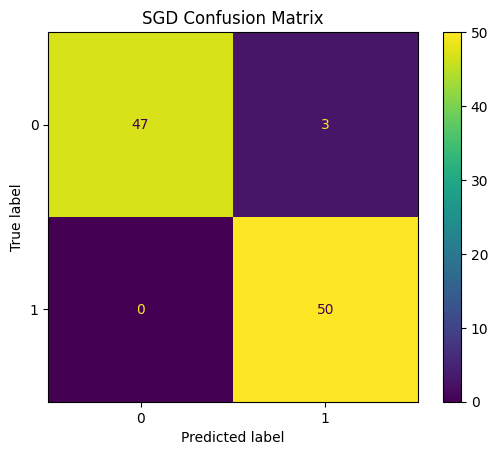

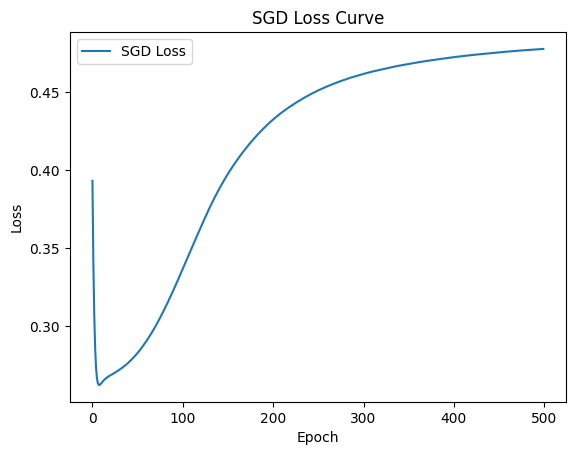


Training with Batch Gradient Descent (BGD):
Epoch 1, Loss: 0.47988642
Epoch 2, Loss: 0.41690920
Epoch 3, Loss: 0.36471229
Epoch 4, Loss: 0.32830134
Epoch 5, Loss: 0.30328164
Epoch 6, Loss: 0.28670427
Epoch 7, Loss: 0.27612509
Epoch 8, Loss: 0.26978125
Epoch 9, Loss: 0.26622724
Epoch 10, Loss: 0.26442964
Epoch 11, Loss: 0.26367367
Epoch 12, Loss: 0.26348796
Epoch 13, Loss: 0.26358970
Epoch 14, Loss: 0.26381512
Epoch 15, Loss: 0.26409204
Epoch 16, Loss: 0.26438961
Epoch 17, Loss: 0.26469443
Epoch 18, Loss: 0.26500394
Epoch 19, Loss: 0.26531112
Epoch 20, Loss: 0.26561663
Epoch 21, Loss: 0.26593489
Epoch 22, Loss: 0.26626452
Epoch 23, Loss: 0.26660429
Epoch 24, Loss: 0.26694742
Epoch 25, Loss: 0.26730486
Epoch 26, Loss: 0.26768269
Epoch 27, Loss: 0.26807090
Epoch 28, Loss: 0.26847233
Epoch 29, Loss: 0.26888891
Epoch 30, Loss: 0.26932024
Epoch 31, Loss: 0.26976904
Epoch 32, Loss: 0.27023746
Epoch 33, Loss: 0.27071508
Epoch 34, Loss: 0.27120813
Epoch 35, Loss: 0.27171670
Epoch 36, Loss: 0.2

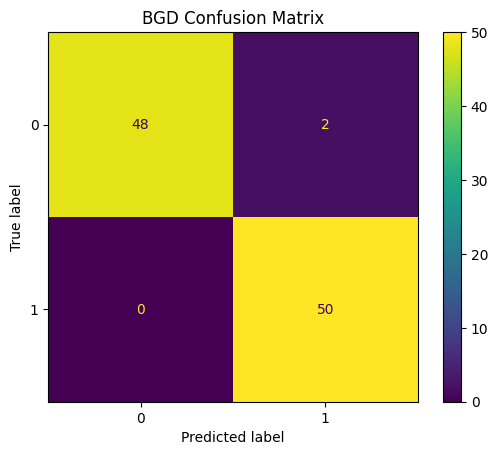

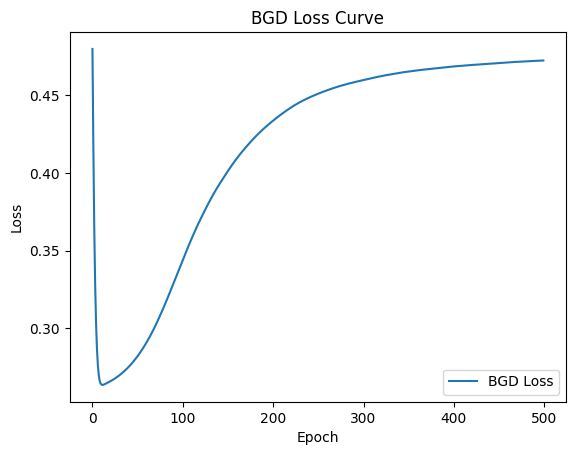


Training with Mini-Batch Gradient Descent (MBGD):
Epoch 1, Loss: 0.48210134
Epoch 2, Loss: 0.41628857
Epoch 3, Loss: 0.36559018
Epoch 4, Loss: 0.32924076
Epoch 5, Loss: 0.30377021
Epoch 6, Loss: 0.28656602
Epoch 7, Loss: 0.27554137
Epoch 8, Loss: 0.26890689
Epoch 9, Loss: 0.26524477
Epoch 10, Loss: 0.26348472
Epoch 11, Loss: 0.26286531
Epoch 12, Loss: 0.26288037
Epoch 13, Loss: 0.26321336
Epoch 14, Loss: 0.26367629
Epoch 15, Loss: 0.26416661
Epoch 16, Loss: 0.26463419
Epoch 17, Loss: 0.26505999
Epoch 18, Loss: 0.26543875
Epoch 19, Loss: 0.26577578
Epoch 20, Loss: 0.26607726
Epoch 21, Loss: 0.26635139
Epoch 22, Loss: 0.26660486
Epoch 23, Loss: 0.26684029
Epoch 24, Loss: 0.26706430
Epoch 25, Loss: 0.26727995
Epoch 26, Loss: 0.26749315
Epoch 27, Loss: 0.26770971
Epoch 28, Loss: 0.26792941
Epoch 29, Loss: 0.26815286
Epoch 30, Loss: 0.26837867
Epoch 31, Loss: 0.26861009
Epoch 32, Loss: 0.26885112
Epoch 33, Loss: 0.26909967
Epoch 34, Loss: 0.26935704
Epoch 35, Loss: 0.26962634
Epoch 36, Los

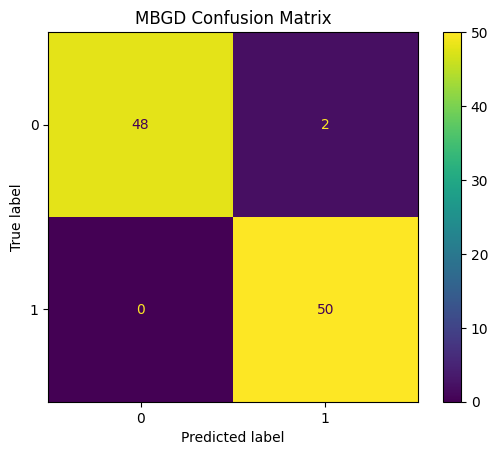

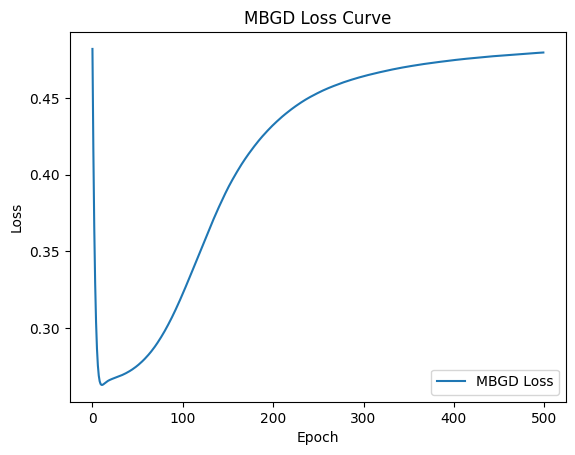

In [ ]:
def main():
    base_folder = '/content/Dataset'


    X_train, X_test, y_train, y_test = preprocess_data(base_folder)


    input_size = X_train.shape[1]
    hidden_size = 80
    output_size = 1

    print("\nRelu Activation Function\n______________________________________________\n")
    print("\nTraining with Stochastic Gradient Descent (SGD):")
    mlp_relu_sgd = MLP_relu(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    start_time = time.time()
    loss_sgd = mlp_relu_sgd.train_SGD(X_train, y_train, epochs=100, learning_rate=0.001)
    training_time = time.time() - start_time
    print(f'SGD Training time: {training_time:.2f} seconds')
    evaluate_model(mlp_relu_sgd, X_test, y_test, "SGD",loss_sgd)


    print("\nTraining with Batch Gradient Descent (BGD):")
    mlp_relu_bgd = MLP_relu(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    start_time = time.time()
    loss_bgd = mlp_relu_bgd.train_BGD(X_train, y_train, epochs=100, learning_rate=0.001)
    training_time = time.time() - start_time
    print(f'BGD Training time: {training_time:.2f} seconds')
    evaluate_model(mlp_relu_bgd, X_test, y_test, "BGD",loss_bgd)


    print("\nTraining with Mini-Batch Gradient Descent (MBGD):")
    mlp_relu_mbgd = MLP_relu(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    start_time = time.time()
    loss_mbgd = mlp_relu_mbgd.train_MBGD(X_train, y_train, epochs=100, batch_size=20, learning_rate=0.001)
    training_time = time.time() - start_time
    print(f'MBGD Training time: {training_time:.2f} seconds')
    evaluate_model(mlp_relu_mbgd, X_test, y_test, "MBGD",loss_mbgd)

def evaluate_model(model, X_test, y_test, method_name,loss_curve):

    y_pred = model.forward(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    accuracy = np.mean(y_pred_classes.flatten() == y_test)


    print(f"{method_name} Accuracy: {accuracy * 100:.2f}%")

    cm = confusion_matrix(y_test, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{method_name} Confusion Matrix')
    plt.show()

    plt.plot(loss_curve, label=f"{method_name} Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{method_name} Loss Curve')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()


In [ ]:
class MLP_zero_weights:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.zeros((input_size, hidden_size))
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.zeros((hidden_size, output_size))
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.hidden_input = np.dot(X, self.W1) + self.b1
        self.hidden_output = sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.W2) + self.b2
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y, learning_rate):
      output_error = self.final_output - y.reshape(-1, 1)
      dA = sigmoid_derivative(self.final_input)
      dW2 = np.dot(self.hidden_output.T, output_error * dA)

      db2 = np.sum(output_error * dA, axis=0, keepdims=True)
      hidden_error = np.dot(output_error, self.W2.T)
      dH1 = sigmoid_derivative(self.hidden_input)
      dW1 = np.dot(X.T, hidden_error * dH1)
      db1 = np.sum(hidden_error * dH1, axis=0, keepdims=True)

      self.W2 -= learning_rate * dW2
      self.b2 -= learning_rate * db2
      self.W1 -= learning_rate * dW1
      self.b1 -= learning_rate * db1


    def train_SGD(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(X)):
                X_sample = X[i:i + 1]
                y_sample = y[i:i + 1]
                self.forward(X_sample)
                self.backward(X_sample, y_sample, learning_rate)
            loss = mean_squared_error(y, self.forward(X))
            print(f'Epoch {epoch + 1}, Loss: {loss:.8f}')

    def train_BGD(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
          self.forward(X)
          self.backward(X, y, learning_rate)
          loss = mean_squared_error(y, self.forward(X))
          print(f'Epoch {epoch + 1}, Loss: {loss:.8f}')

    def train_MBGD(self, X, y, epochs, batch_size, learning_rate):
        for epoch in range(epochs):
            for i in range(0, len(X), batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                self.forward(X_batch)
                self.backward(X_batch, y_batch, learning_rate)
            loss = mean_squared_error(y, self.forward(X))
            print(f'Epoch {epoch + 1}, Loss: {loss:.8f}')


Training with Stochastic Gradient Descent (SGD) with initializing all the weights using zero:
Epoch 1, Loss: 0.25005386
Epoch 2, Loss: 0.25013308
Epoch 3, Loss: 0.25018929
Epoch 4, Loss: 0.25021478
Epoch 5, Loss: 0.25021370
Epoch 6, Loss: 0.25019305
Epoch 7, Loss: 0.25015981
Epoch 8, Loss: 0.25012030
Epoch 9, Loss: 0.25008008
Epoch 10, Loss: 0.25004413
Epoch 11, Loss: 0.25001683
Epoch 12, Loss: 0.25000195
Epoch 13, Loss: 0.25000235
Epoch 14, Loss: 0.25001975
Epoch 15, Loss: 0.25005469
Epoch 16, Loss: 0.25010672
Epoch 17, Loss: 0.25017488
Epoch 18, Loss: 0.25025850
Epoch 19, Loss: 0.25035775
Epoch 20, Loss: 0.25047412
Epoch 21, Loss: 0.25061049
Epoch 22, Loss: 0.25077093
Epoch 23, Loss: 0.25096033
Epoch 24, Loss: 0.25118401
Epoch 25, Loss: 0.25144743
Epoch 26, Loss: 0.25175621
Epoch 27, Loss: 0.25211629
Epoch 28, Loss: 0.25253427
Epoch 29, Loss: 0.25301742
Epoch 30, Loss: 0.25357346
Epoch 31, Loss: 0.25421011
Epoch 32, Loss: 0.25493445
Epoch 33, Loss: 0.25575235
Epoch 34, Loss: 0.25666

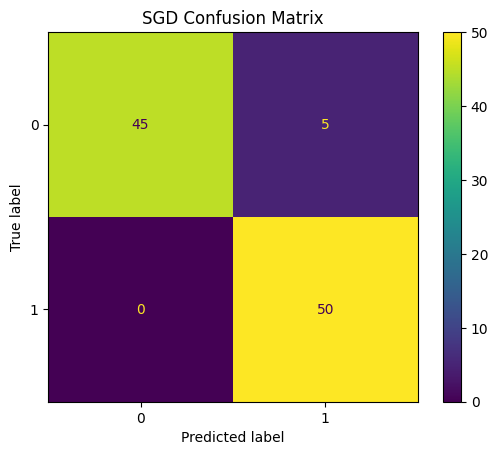


Training with Batch Gradient Descent (BGD) with initializing all the weights using zero:
Epoch 1, Loss: 0.25000000
Epoch 2, Loss: 0.25000000
Epoch 3, Loss: 0.25000000
Epoch 4, Loss: 0.25000000
Epoch 5, Loss: 0.25000000
Epoch 6, Loss: 0.25000000
Epoch 7, Loss: 0.25000000
Epoch 8, Loss: 0.25000000
Epoch 9, Loss: 0.25000000
Epoch 10, Loss: 0.25000000
Epoch 11, Loss: 0.25000000
Epoch 12, Loss: 0.25000000
Epoch 13, Loss: 0.25000000
Epoch 14, Loss: 0.25000000
Epoch 15, Loss: 0.25000000
Epoch 16, Loss: 0.25000000
Epoch 17, Loss: 0.25000000
Epoch 18, Loss: 0.25000000
Epoch 19, Loss: 0.25000000
Epoch 20, Loss: 0.25000000
Epoch 21, Loss: 0.25000000
Epoch 22, Loss: 0.25000000
Epoch 23, Loss: 0.25000000
Epoch 24, Loss: 0.25000000
Epoch 25, Loss: 0.25000000
Epoch 26, Loss: 0.25000000
Epoch 27, Loss: 0.25000000
Epoch 28, Loss: 0.25000000
Epoch 29, Loss: 0.25000000
Epoch 30, Loss: 0.25000000
Epoch 31, Loss: 0.25000000
Epoch 32, Loss: 0.25000000
Epoch 33, Loss: 0.25000000
Epoch 34, Loss: 0.25000000
E

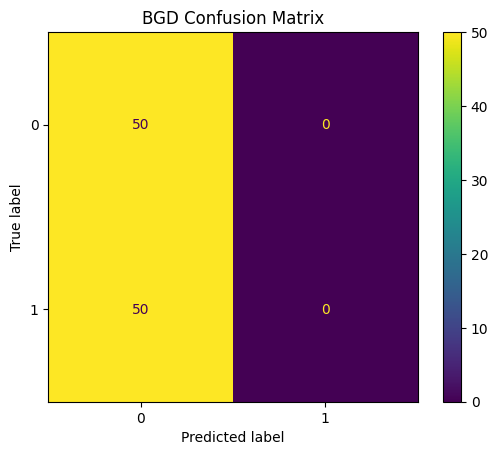


Training with Mini-Batch Gradient Descent (MBGD)with initializing all the weights using zero:
Epoch 1, Loss: 0.25003452
Epoch 2, Loss: 0.25004675
Epoch 3, Loss: 0.25003469
Epoch 4, Loss: 0.25001832
Epoch 5, Loss: 0.25000635
Epoch 6, Loss: 0.25000067
Epoch 7, Loss: 0.25000073
Epoch 8, Loss: 0.25000544
Epoch 9, Loss: 0.25001384
Epoch 10, Loss: 0.25002527
Epoch 11, Loss: 0.25003937
Epoch 12, Loss: 0.25005604
Epoch 13, Loss: 0.25007542
Epoch 14, Loss: 0.25009786
Epoch 15, Loss: 0.25012393
Epoch 16, Loss: 0.25015443
Epoch 17, Loss: 0.25019041
Epoch 18, Loss: 0.25023323
Epoch 19, Loss: 0.25028458
Epoch 20, Loss: 0.25034648
Epoch 21, Loss: 0.25042136
Epoch 22, Loss: 0.25051195
Epoch 23, Loss: 0.25062128
Epoch 24, Loss: 0.25075260
Epoch 25, Loss: 0.25090936
Epoch 26, Loss: 0.25109532
Epoch 27, Loss: 0.25131469
Epoch 28, Loss: 0.25157249
Epoch 29, Loss: 0.25187469
Epoch 30, Loss: 0.25222835
Epoch 31, Loss: 0.25264147
Epoch 32, Loss: 0.25312279
Epoch 33, Loss: 0.25368133
Epoch 34, Loss: 0.25432

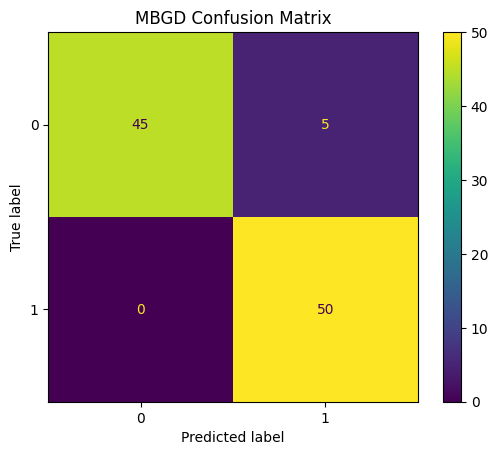

In [ ]:
def main():
    base_folder = '/content/Dataset'


    X_train, X_test, y_train, y_test = preprocess_data(base_folder)


    input_size = X_train.shape[1]
    hidden_size = 80
    output_size = 1


    print("\nTraining with Stochastic Gradient Descent (SGD) with initializing all the weights using zero:")
    mlp_zero_sgd = MLP_zero_weights(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    start_time = time.time()
    mlp_zero_sgd.train_SGD(X_train, y_train, epochs=100, learning_rate=0.001)
    training_time = time.time() - start_time
    print(f'SGD Training time: {training_time:.2f} seconds')
    evaluate_model(mlp_zero_sgd, X_test, y_test, "SGD")


    print("\nTraining with Batch Gradient Descent (BGD) with initializing all the weights using zero:")
    mlp_zero_bgd = MLP_zero_weights(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    start_time = time.time()
    mlp_zero_bgd.train_BGD(X_train, y_train, epochs=100, learning_rate=0.001)
    training_time = time.time() - start_time
    print(f'BGD Training time: {training_time:.2f} seconds')
    evaluate_model(mlp_zero_bgd, X_test, y_test, "BGD")


    print("\nTraining with Mini-Batch Gradient Descent (MBGD)with initializing all the weights using zero:")
    mlp_zero_mbgd = MLP_zero_weights(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    start_time = time.time()
    mlp_zero_mbgd.train_MBGD(X_train, y_train, epochs=100, batch_size=20, learning_rate=0.001)
    training_time = time.time() - start_time
    print(f'MBGD Training time: {training_time:.2f} seconds')
    evaluate_model(mlp_zero_mbgd, X_test, y_test, "MBGD")

def evaluate_model(model, X_test, y_test, method_name):

    y_pred = model.forward(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    accuracy = np.mean(y_pred_classes.flatten() == y_test)


    print(f"\n{method_name} Model Predictions:")
    for i in range(len(y_test)):
        print(f"True Label: {y_test[i]}, Predicted: {y_pred_classes[i][0]}")

    print(f"{method_name} Accuracy: {accuracy * 100:.2f}%")

    cm = confusion_matrix(y_test, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{method_name} Confusion Matrix')
    plt.show()

if __name__ == '__main__':
    main()
